In [1]:
import numpy as np
import matplotlib.pyplot as plt
from flux.shape import CgalTrimeshShapeModel, get_surface_normals

import pyvista as pv

# (Memoryless) Temperature Computation

Consider the surface temperature fields obtained by running a radiative equilibrium temperature computation with no sub-surface heating/thermal model. One can compare the temperatures generated using a compressed form factor matrix to those generated via the uncompressed matrix.

In [ ]:
mesh_dir = 'python-flux/examples/shackleton_vary_outer/'
mesh_name = 'shackleton'

In [33]:
V = np.load(f'{mesh_dir}/{mesh_name}_verts_2.0_80.npy')
F = np.load(f'{mesh_dir}/{mesh_name}_faces_2.0_80.npy')

# convert verts from km to m
V *= 1e3

N = get_surface_normals(V, F)
N[N[:, 2] > 0] *= -1

faces_padded = np.concatenate([3*np.ones(F.shape[0],dtype=int).reshape(-1,1), F], axis=1)

shape_model = CgalTrimeshShapeModel(V, F, N)
F.shape

(16569, 3)

Load the temperature profiles for the triangular mesh using the uncompressed form factor matrix.

In [6]:
path = f'{mesh_dir}/results/true_2.0_80/T_frames_memoryless'
T_frames_true = []
for i in range(31):
    T_frames_true.append(np.load(path+"/T{:03d}.npy".format(i)))
T_frames_true = np.array(T_frames_true)
T_frames_true.shape

(31, 16569)

In [22]:
step = 15

grid = pv.PolyData(V, faces=faces_padded.flatten(), n_faces=F.shape[0])

grid['True Temperature (K)'] = np.empty(F.shape[0])
grid['True Temperature (K)'][...] = T_frames_true[step,:]
grid.plot(clim=[0,50])

Widget(value="<iframe src='http://localhost:56684/index.html?ui=P_0x235fb49f490_9&reconnect=auto' style='width…

Load the temperature profiles for the triangular mesh using the compressed form factor matrix.

In [7]:
path = f'{mesh_dir}/results/svd_2.0_80_1e-02_40k0/T_frames_memoryless'
T_frames_svd = []
for i in range(31):
    T_frames_svd.append(np.load(path+"/T{:03d}.npy".format(i)))
T_frames_svd = np.array(T_frames_svd)
T_frames_svd.shape

(31, 16569)

Consider the absolute and relative differences between the two fields, and overlay them on a mesh of the surface for a particular time step.

In [8]:
T_frames_diff_field = abs(T_frames_true - T_frames_svd)
T_frames_diff_field.shape

(31, 16569)

In [21]:
step = 15

grid = pv.PolyData(V, faces=faces_padded.flatten(), n_faces=F.shape[0])

grid['Temp Absolute Difference (K)'] = np.empty(F.shape[0])
grid['Temp Absolute Difference (K)'][...] = T_frames_diff_field[step,:]
grid.plot(clim=[0, 5])

Widget(value="<iframe src='http://localhost:56684/index.html?ui=P_0x235d71d4e10_8&reconnect=auto' style='width…

In [10]:
T_frames_rel_diff_field = abs(T_frames_true - T_frames_svd) / T_frames_true
T_frames_rel_diff_field.shape

C:\Users\mwrep\AppData\Local\Temp\ipykernel_20200\3866674088.py:1: RuntimeWarning: divide by zero encountered in divide
  T_frames_rel_diff_field = abs(T_frames_true - T_frames_svd) / T_frames_true
C:\Users\mwrep\AppData\Local\Temp\ipykernel_20200\3866674088.py:1: RuntimeWarning: invalid value encountered in divide
  T_frames_rel_diff_field = abs(T_frames_true - T_frames_svd) / T_frames_true


(31, 16569)

In [30]:
step = 15

grid = pv.PolyData(V, faces=faces_padded.flatten(), n_faces=F.shape[0])

grid['Temp Relative Difference'] = np.empty(F.shape[0])
grid['Temp Relative Difference'][...] = T_frames_rel_diff_field[step,:]
grid.plot(clim=[-0.2, 1.1])

Widget(value="<iframe src='http://localhost:56684/index.html?ui=P_0x235c63b6dd0_14&reconnect=auto' style='widt…

Plot the absolute difference in temperature across all triangles and all times against the temperature computed using the uncompressed matrix.

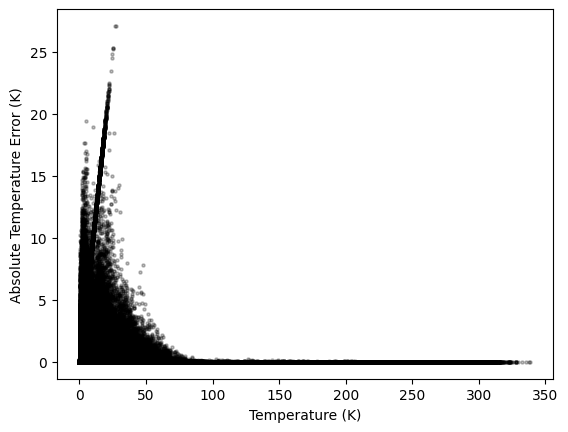

In [28]:
plt.scatter(T_frames_true, abs(T_frames_true - T_frames_svd), color='k', s=5, alpha=0.25)
plt.xlabel("Temperature (K)")
plt.ylabel("Absolute Temperature Error (K)")
plt.show()